In [38]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as  sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler

In [13]:
data = pd.read_csv('dataset/creditcard.csv')

data.head().T

,0,1,2,3,4
Time,0.000000,0.000000,1.000000,1.000000,2.000000
V1,-1.359807,1.191857,-1.358354,-0.966272,-1.158233
V2,-0.072781,0.266151,-1.340163,-0.185226,0.877737
V3,2.536347,0.166480,1.773209,1.792993,1.548718
V4,1.378155,0.448154,0.379780,-0.863291,0.403034
V5,-0.338321,0.060018,-0.503198,-0.010309,-0.407193
V6,0.462388,-0.082361,1.800499,1.247203,0.095921
V7,0.239599,-0.078803,0.791461,0.237609,0.592941
V8,0.098698,0.085102,0.247676,0.377436,-0.270533
V9,0.363787,-0.255425,-1.514654,-1.387024,0.817739


In [14]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,3.918649e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,5.682686e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-8.761736e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.811118e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,-1.552103e-15,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,2.040130e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-1.698953e-15,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,-1.893285e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-3.147640e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


0    284315
1       492
Name: Class, dtype: int64


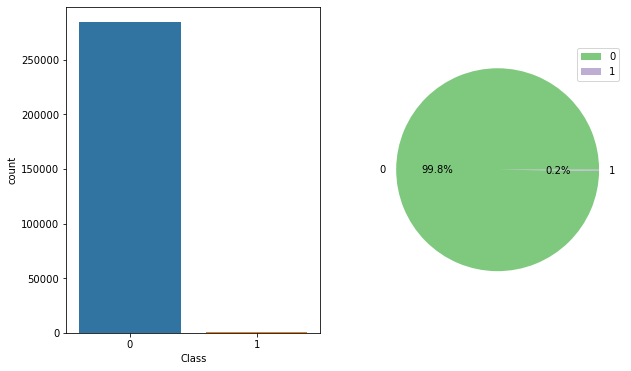

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(10, 6))
sns.countplot(x="Class",ax=axes[0],data=data)
color_palette = colors = sns.color_palette('Accent')
counts = data['Class'].value_counts()
axes[1].pie(counts, labels = counts.index, colors=color_palette,autopct='%1.1f%%')
axes[1].legend()
print(counts)

C:\Users\atik_\AppData\Local\Temp/ipykernel_6864/854192469.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  sns.heatmap(class_d[:, np.newaxis], ax=axes, annot=True,vmin=-.1, vmax=.5 ,cmap="rocket_r")


<AxesSubplot:>

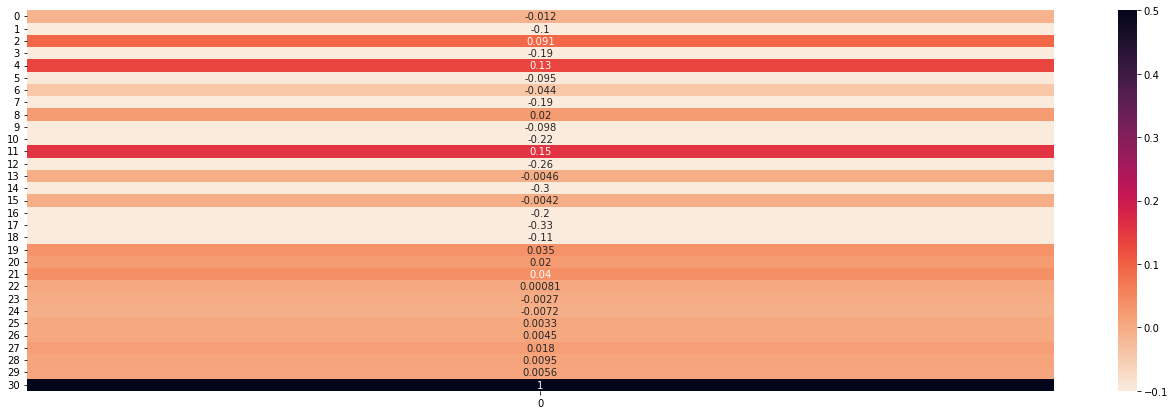

In [29]:
fig, axes = plt.subplots(1, 1, figsize=(23, 7))
class_d = data.corr().iloc[-1,:]
sns.heatmap(class_d[:, np.newaxis], ax=axes, annot=True,vmin=-.1, vmax=.5 ,cmap="rocket_r")

<AxesSubplot:>

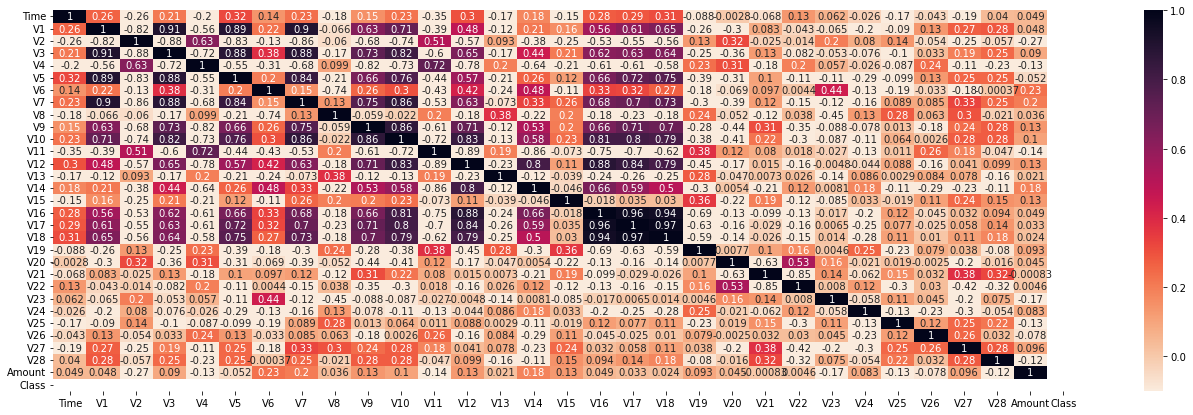

In [37]:
fraud_data = data[data['Class']==1]
fig, axes = plt.subplots(1, 1, figsize=(23, 7))
class_d = fraud_data.corr()
sns.heatmap(class_d, ax=axes, annot=True,vmin=-.1, vmax=1 ,cmap="rocket_r")

In [40]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,1:-1], data.iloc[:,-1], test_size=0.2, random_state=42)

In [42]:
ros = RandomOverSampler(random_state=0)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train,y_train) 

0    227451
1    227451
Name: Class, dtype: int64


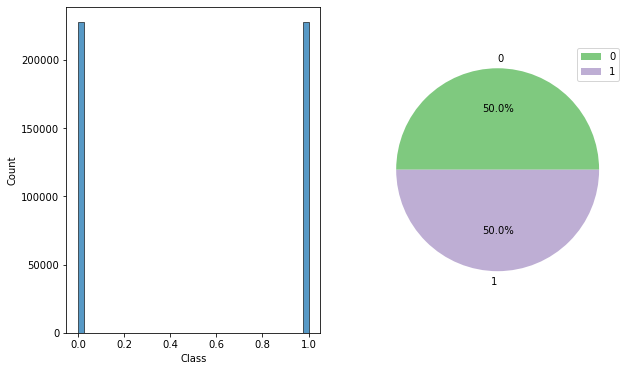

In [59]:
fig, axes = plt.subplots(1, 2, figsize=(10, 6))
counts = y_train_resampled.value_counts()
sns.histplot(data=y_train_resampled,ax=axes[0])
color_palette = colors = sns.color_palette('Accent')

axes[1].pie(counts, labels = counts.index, colors=color_palette,autopct='%1.1f%%')
axes[1].legend()
print(counts)

In [48]:
y_train_resampled.describe()

count    454902.000000
mean          0.500000
std           0.500001
min           0.000000
25%           0.000000
50%           0.500000
75%           1.000000
max           1.000000
Name: Class, dtype: float64

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 2 dimension(s) and the array at index 1 has 1 dimension(s)

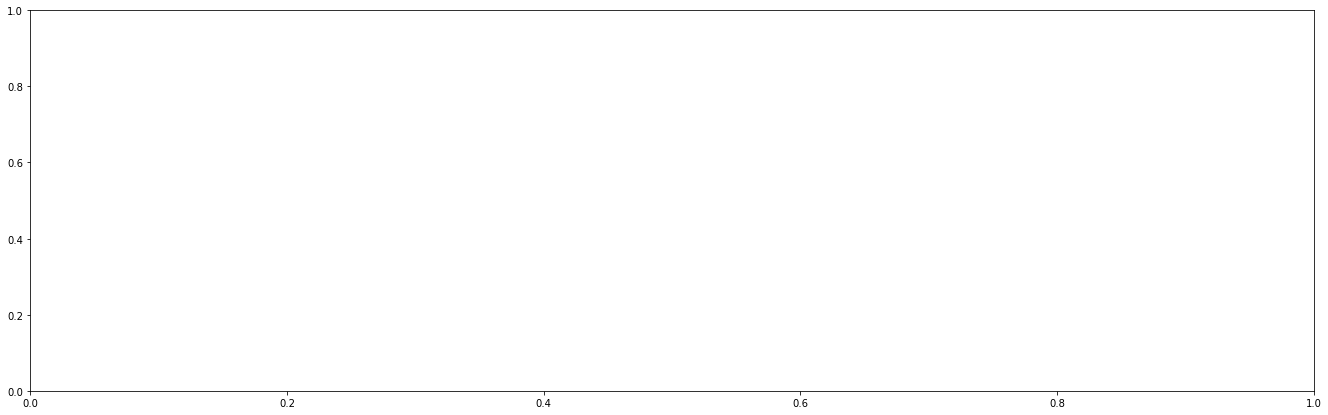

In [60]:
fig, axes = plt.subplots(1, 1, figsize=(23, 7))
data_w = pd.concat([X_train_resampled,y_train_resampled], axis=1)
class_d = data_w.corr().iloc[-1,:]
sns.heatmap(class_d[:, np.newaxis], ax=axes, annot=True,vmin=-.1, vmax=.5 ,cmap="rocket_r")